# Data Loading and Exploring

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from datetime import timedelta
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [157]:
data= pd.read_csv('C:\\Users\\lenovo\\Desktop\\Fixed Solutions\\Task 2\\Model\\Online Retail.xlsx - Online Retail.csv')

In [158]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [159]:
data.shape

(541909, 8)

In [160]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In the quantity and the unit price there is negative values

In [161]:
negative_quantity_count = data[data['Quantity'] < 0].shape[0]
print(f"Negative Quantity values: {negative_quantity_count}")
negative_unitprice_count = data[data['UnitPrice'] < 0].shape[0]
print(f"Negative UnitPrice values: {negative_unitprice_count}")


Negative Quantity values: 10624
Negative UnitPrice values: 2


Many negative quantity

In [162]:

negative_qty_rows = data[data['Quantity'] < 0]

returns = negative_qty_rows[negative_qty_rows['InvoiceNo'].astype(str).str.startswith('C')]
print(f"Returns with Invoice starting with 'C': {returns.shape[0]}")


Returns with Invoice starting with 'C': 9288


C is for cancellation and most of the cancelations have negative quantity

In [163]:
non_returns = negative_qty_rows[~negative_qty_rows['InvoiceNo'].astype(str).str.startswith('C')]
print(f"Negative Quantity rows NOT starting with 'C': {non_returns.shape[0]}")


Negative Quantity rows NOT starting with 'C': 1336


In [164]:
unique_invoices = data['InvoiceNo'].nunique()
print(f"Number of unique invoices: {unique_invoices}")

Number of unique invoices: 25900


In [165]:
data[data['InvoiceNo'].str.startswith('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/11 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/11 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/11 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/11 11:58,1.25,17315.0,United Kingdom


In [166]:
import re
letters_in_invoices = set(re.findall(r'[A-Za-z]', ''.join(data['InvoiceNo'].unique())))
print(f"Letters found in InvoiceNo: {sorted(letters_in_invoices)}")

Letters found in InvoiceNo: ['A', 'C']


In [167]:
invoice_starts = data['InvoiceNo'].astype(str).str[0]
print(invoice_starts.value_counts())


5    532618
C      9288
A         3
Name: InvoiceNo, dtype: int64


In [168]:
a_invoices = data[data['InvoiceNo'].astype(str).str.startswith('A')]
print(a_invoices[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice']].sample(3))


       InvoiceNo StockCode      Description  Quantity  UnitPrice
299984   A563187         B  Adjust bad debt         1  -11062.06
299982   A563185         B  Adjust bad debt         1   11062.06
299983   A563186         B  Adjust bad debt         1  -11062.06


In [169]:
negative_qty_rows['Description']

141                               Discount
154        SET OF 3 COLOURED  FLYING DUCKS
235         PLASTERS IN TIN CIRCUS PARADE 
236       PACK OF 12 PINK PAISLEY TISSUES 
237       PACK OF 12 BLUE PAISLEY TISSUES 
                        ...               
540449     ZINC T-LIGHT HOLDER STARS SMALL
541541                              Manual
541715          VICTORIAN SEWING BOX LARGE
541716    HANGING HEART JAR T-LIGHT HOLDER
541717       36 PENCILS TUBE RED RETROSPOT
Name: Description, Length: 10624, dtype: object

In [170]:
cancel_rows = data[data['InvoiceNo'].astype(str).str.startswith('C')]

returns_only = cancel_rows[cancel_rows['Quantity'] < 0]

top_returns = returns_only['Description'].value_counts().head(10)
print(top_returns)


Manual                               244
REGENCY CAKESTAND 3 TIER             181
POSTAGE                              126
JAM MAKING SET WITH JARS              87
Discount                              77
SET OF 3 CAKE TINS PANTRY DESIGN      74
SAMPLES                               61
STRAWBERRY CERAMIC TRINKET BOX        55
ROSES REGENCY TEACUP AND SAUCER       54
RECIPE BOX PANTRY YELLOW DESIGN       47
Name: Description, dtype: int64


In [171]:
percent_c_invoices = (data['InvoiceNo'].astype(str).str.startswith('C').sum() / len(data)) * 100
print(f"Percentage of invoices starting with 'C': {percent_c_invoices:.2f}%")

Percentage of invoices starting with 'C': 1.71%


In [172]:
zero_quantity_count = data[data['Quantity'] == 0].shape[0]
print(f"Rows with Quantity equal to zero: {zero_quantity_count}")

Rows with Quantity equal to zero: 0


In [173]:
missing_values = data.isnull().sum()
print("Missing values in each column:", missing_values)

Missing values in each column: InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


The customer Id and Describtion are the columns with Nulls (24.926% of data is the customer id)

In [174]:
both_nulls_count = data[data['CustomerID'].isnull() & data['Description'].isnull()].shape[0]
print(f"Rows with both CustomerID and Description nulls: {both_nulls_count}")

Rows with both CustomerID and Description nulls: 1454


we can say now that all the describtions that are null the customer id is null too (Since our Segmentation is on the customer so we cant use rows with null customers)

In [175]:
duplicate=data.duplicated()
print(f"Number of duplicate rows: {duplicate.sum()}")

Number of duplicate rows: 5268


In [176]:
percent_duplicates = (duplicate.sum() / len(duplicate)) * 100
print(f"Percentage of duplicate rows: {percent_duplicates:.2f}%")

Percentage of duplicate rows: 0.97%


Data contain Duplicate rows that was enteredd more than one time with (0.97%)

In [177]:
unitprice_zero_count = data[data['UnitPrice'] == 0].shape[0]
print(f"Rows with UnitPrice equal to zero: {unitprice_zero_count}")

Rows with UnitPrice equal to zero: 2515


There are 2515 unique price which are zero?


In [178]:
zero_unitprice_descriptions = data[data['UnitPrice'] == 0]['Description']
print(zero_unitprice_descriptions)

622                                NaN
1970                               NaN
1971                               NaN
1972                               NaN
1987                               NaN
                      ...             
536981                             NaN
538504    POLYESTER FILLER PAD 45x45cm
538505    POLYESTER FILLER PAD 40x40cm
538554                             NaN
538919                         smashed
Name: Description, Length: 2515, dtype: object


most of there description is null which meand the customer id is null so we will drop them

After exploring the data lets clean it 

# Data cleaning

In [179]:
data_cleaned = data.dropna(subset=['CustomerID'])
print(f"Rows after dropping CustomerID nulls: {data_cleaned.shape[0]}")

Rows after dropping CustomerID nulls: 406829


In [180]:
data_cleaned.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [181]:
data_cleaned = data_cleaned.drop_duplicates()
print(f"Rows after dropping duplicates: {data_cleaned.shape[0]}")

Rows after dropping duplicates: 401604


In [182]:
data_cleaned.duplicated().sum()

0

In [183]:
data_cleaned = data_cleaned[~data_cleaned['InvoiceNo'].astype(str).str.startswith('C')]
print(f"Rows after dropping invoices starting with 'C': {data_cleaned.shape[0]}")

Rows after dropping invoices starting with 'C': 392732


In [184]:
unitprice_zero_count = data_cleaned[data_cleaned['UnitPrice'] == 0].shape[0]
print(f"Rows with UnitPrice equal to zero: {unitprice_zero_count}")

Rows with UnitPrice equal to zero: 40


In [185]:
data_cleaned = data_cleaned[data_cleaned['UnitPrice'] != 0]
print(f"Rows after dropping UnitPrice zero: {data_cleaned.shape[0]}")

Rows after dropping UnitPrice zero: 392692


## Non-Product Entries in E-Commerce Data

In real-world e-commerce datasets, not all rows represent actual products sold to customers. Some rows exist for **administrative or financial purposes**. These are known as **non-product entries**, and they include:

### Common Non-Product Descriptions:
- **"Manual"**: System-generated entries for internal adjustments or corrections.
- **"Postage"**, **"DOTCOM POSTAGE"**, **"CARRIAGE"**: Shipping charges billed to customers.
- **"Bank Charges"**: Financial adjustments (e.g., bank transaction fees).
- **"Samples"**: Free items provided to customers.
- **"Discount"**: Negative-priced rows representing applied discounts.
- **"Adjust bad debt"**: Accounting entries to handle unpaid invoices.

---

## Why We Should Exclude These from Customer Clustering

These rows do not reflect a customer's actual **purchasing behavior**, and including them can distort segmentation results:

- **Skewed monetary values**: Fees, discounts, or debt adjustments can create abnormally high or low revenue per customer.
- **No product involved**: These entries don't represent a product choice, preference, or quantity.
- **Artificially inflated transactions**: Shipping and corrections may have unit prices but aren't purchases.

---




In [186]:
non_product_codes = ['POST', 'DOT', 'M', 'C2', 'BANK CHARGES']
non_product_rows = data_cleaned[data_cleaned['StockCode'].isin(non_product_codes)]
print(f"Rows with non-product StockCodes: {len(non_product_rows)} ({len(non_product_rows) / len(data_cleaned) * 100:.2f}%)")
display(non_product_rows.head())

Rows with non-product StockCodes: 1539 (0.39%)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,12/1/10 8:45,18.00,12583.0,France
386,536403,POST,POSTAGE,1,12/1/10 11:27,15.00,12791.0,Netherlands
1123,536527,POST,POSTAGE,1,12/1/10 13:04,18.00,12662.0,Germany
1423,536540,C2,CARRIAGE,1,12/1/10 14:05,50.00,14911.0,EIRE
2239,536569,M,Manual,1,12/1/10 15:35,1.25,16274.0,United Kingdom


In [187]:
non_product_rows['TotalPrice'] = non_product_rows['Quantity'] * non_product_rows['UnitPrice']
non_product_rows['TotalPrice'].sum()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_22476\108417258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_product_rows['TotalPrice'] = non_product_rows['Quantity'] * non_product_rows['UnitPrice']


149981.251

There is 149981.251 revenue from the non-product enteries

In [188]:
data_cleaned = data_cleaned[~data_cleaned['StockCode'].isin(non_product_codes)]
print(f"Rows after dropping non-product StockCodes: {data_cleaned.shape[0]}")

Rows after dropping non-product StockCodes: 391153


In [189]:
data_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [190]:
data_cleaned.describe()

,Quantity,UnitPrice,CustomerID
count,391153.000000,391153.000000,391153.000000
mean,13.145207,2.874350,15295.171156
std,180.807141,4.284729,1710.334509
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16794.000000
max,80995.000000,649.500000,18287.000000


Distribution is skewed Median is much lower than mean right-skewed distribution Suggests that a few big purchases skew the average

# EDA

In [191]:
data_cleaned['Total_Price'] = data_cleaned['Quantity'] * data_cleaned['UnitPrice']
display(data_cleaned.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [192]:
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate']) 

In [193]:
data_cleaned['day'] = data_cleaned['InvoiceDate'].dt.day_name()
data_cleaned['month_name'] = data_cleaned['InvoiceDate'].dt.month_name()
data_cleaned['year'] = data_cleaned['InvoiceDate'].apply(lambda x: x.year)
data_cleaned['month'] = data_cleaned['InvoiceDate'].apply(lambda x: x.month)
data_cleaned['date'] = data_cleaned['InvoiceDate'].apply(lambda x: x.day)
data_cleaned['hour'] = data_cleaned['InvoiceDate'].apply(lambda x: x.hour)
data_cleaned['minute'] = data_cleaned['InvoiceDate'].apply(lambda x: x.minute)

In [194]:
data_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,day,month_name,year,month,date,hour,minute
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday,December,2010,12,1,8,26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,2010,12,1,8,26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday,December,2010,12,1,8,26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,2010,12,1,8,26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,2010,12,1,8,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,Friday,December,2011,12,9,12,50
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,Friday,December,2011,12,9,12,50
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,Friday,December,2011,12,9,12,50
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,Friday,December,2011,12,9,12,50


Distribution od numeric values

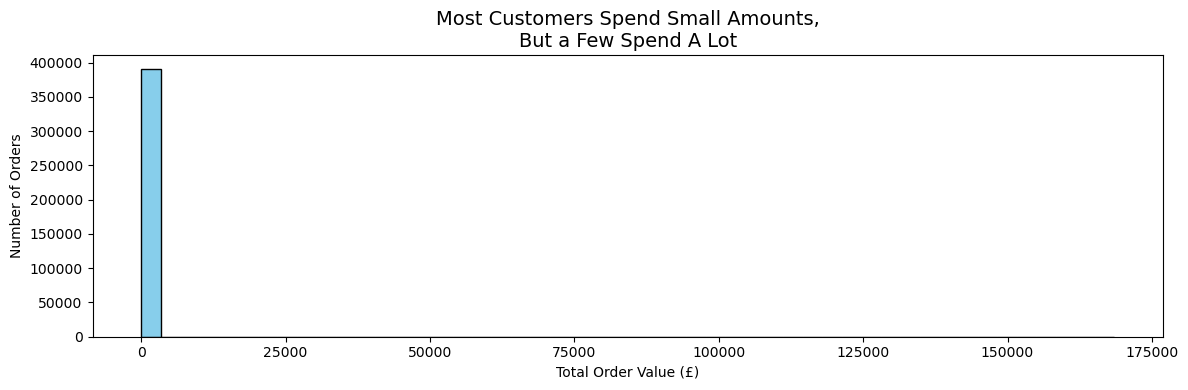

In [195]:
import matplotlib.pyplot as plt



plt.figure(figsize=(12, 4))


plt.hist(data_cleaned['Total_Price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Most Customers Spend Small Amounts,\nBut a Few Spend A Lot', fontsize=14)
plt.xlabel('Total Order Value (£)')
plt.ylabel('Number of Orders')


plt.tight_layout()
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_22476\3635697626.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,count)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_22476\3635697626.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned[feature])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_22476\3635697626.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar f

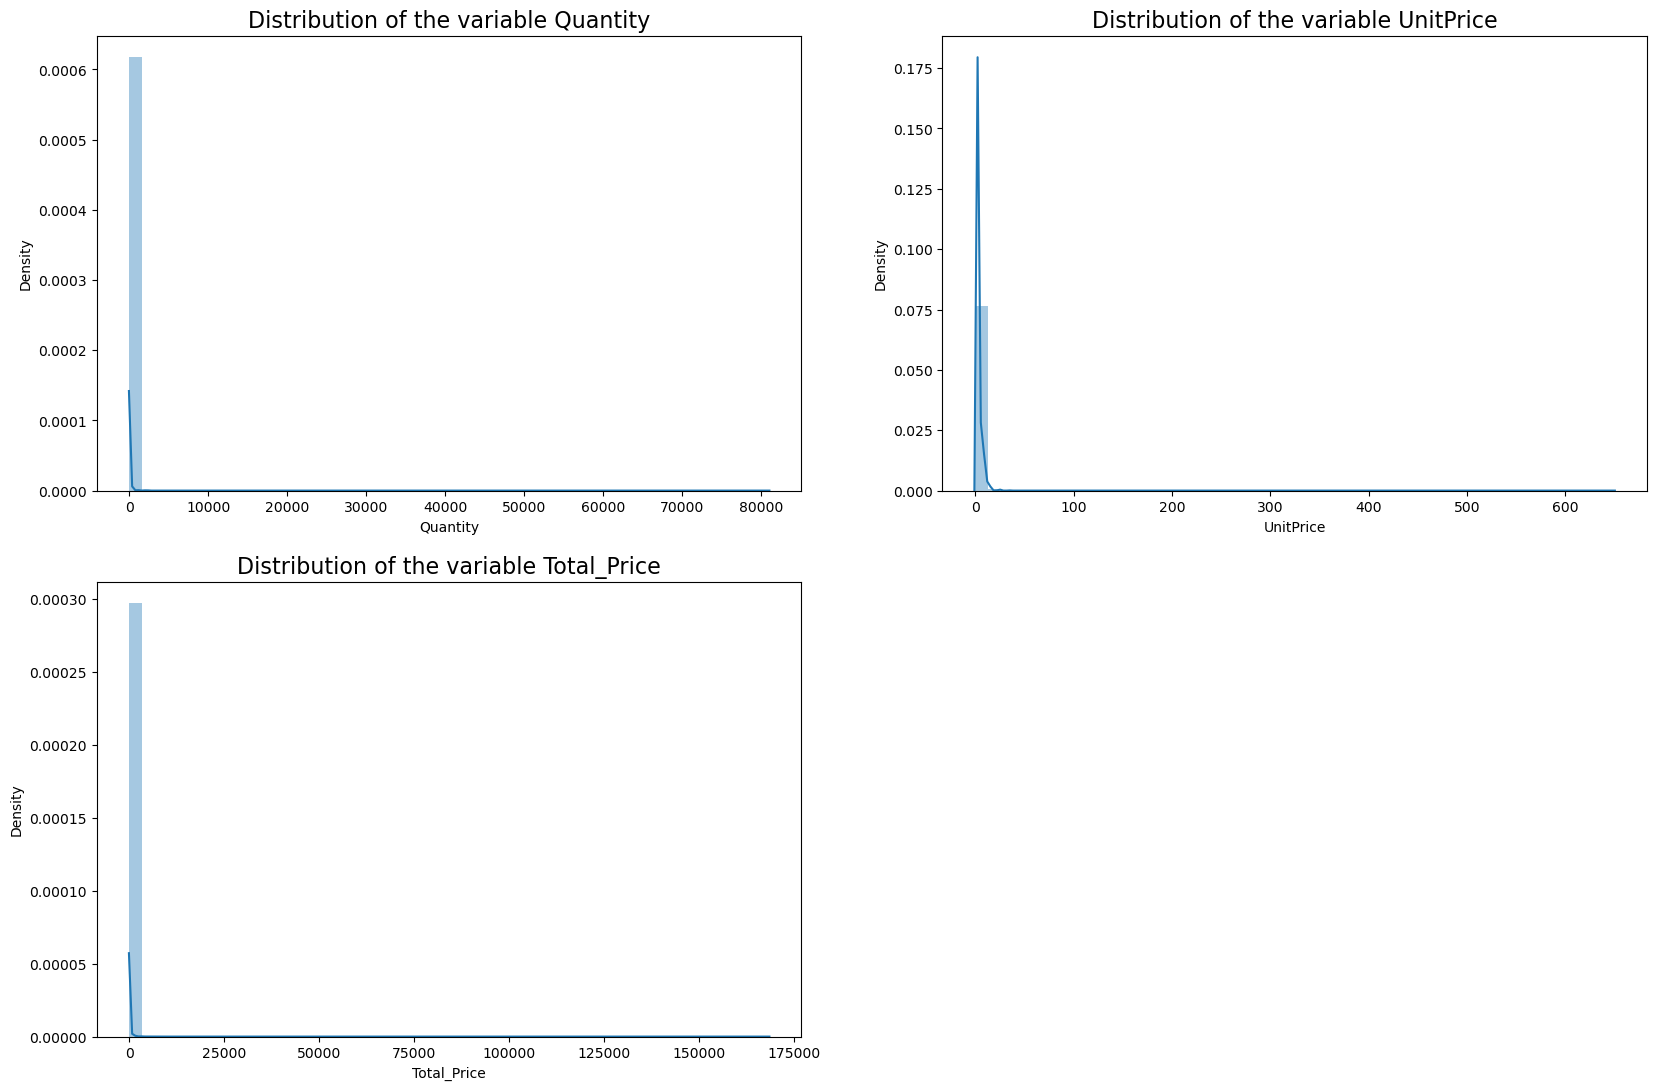

In [196]:
num_features = ['Quantity', 'UnitPrice', 'Total_Price']
count = 1
plt.subplots(figsize=(20,13))
for feature in num_features:
  plt.subplot(2,2,count)
  sns.distplot(data_cleaned[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

### Customer Behavior Insights from Right-Skewed Distributions

The data shows a heavily right-skewed distribution across Quantity, UnitPrice, and TotalPrice:

- Most customers buy low quantities and low-cost items.
- A small number of customers make very large or high-value purchases.
- These "heavy" transactions create a long tail and can skew clustering or segmentation results.

This tells us that while most customers behave similarly, a few are exceptionally valuable. These customers may form their own cluster, but we must transform or scale the data properly to prevent distortion.


C:\Users\lenovo\AppData\Local\Temp\ipykernel_22476\1319435210.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,count)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_22476\1319435210.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(data_cleaned[feature]))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_22476\1319435210.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with

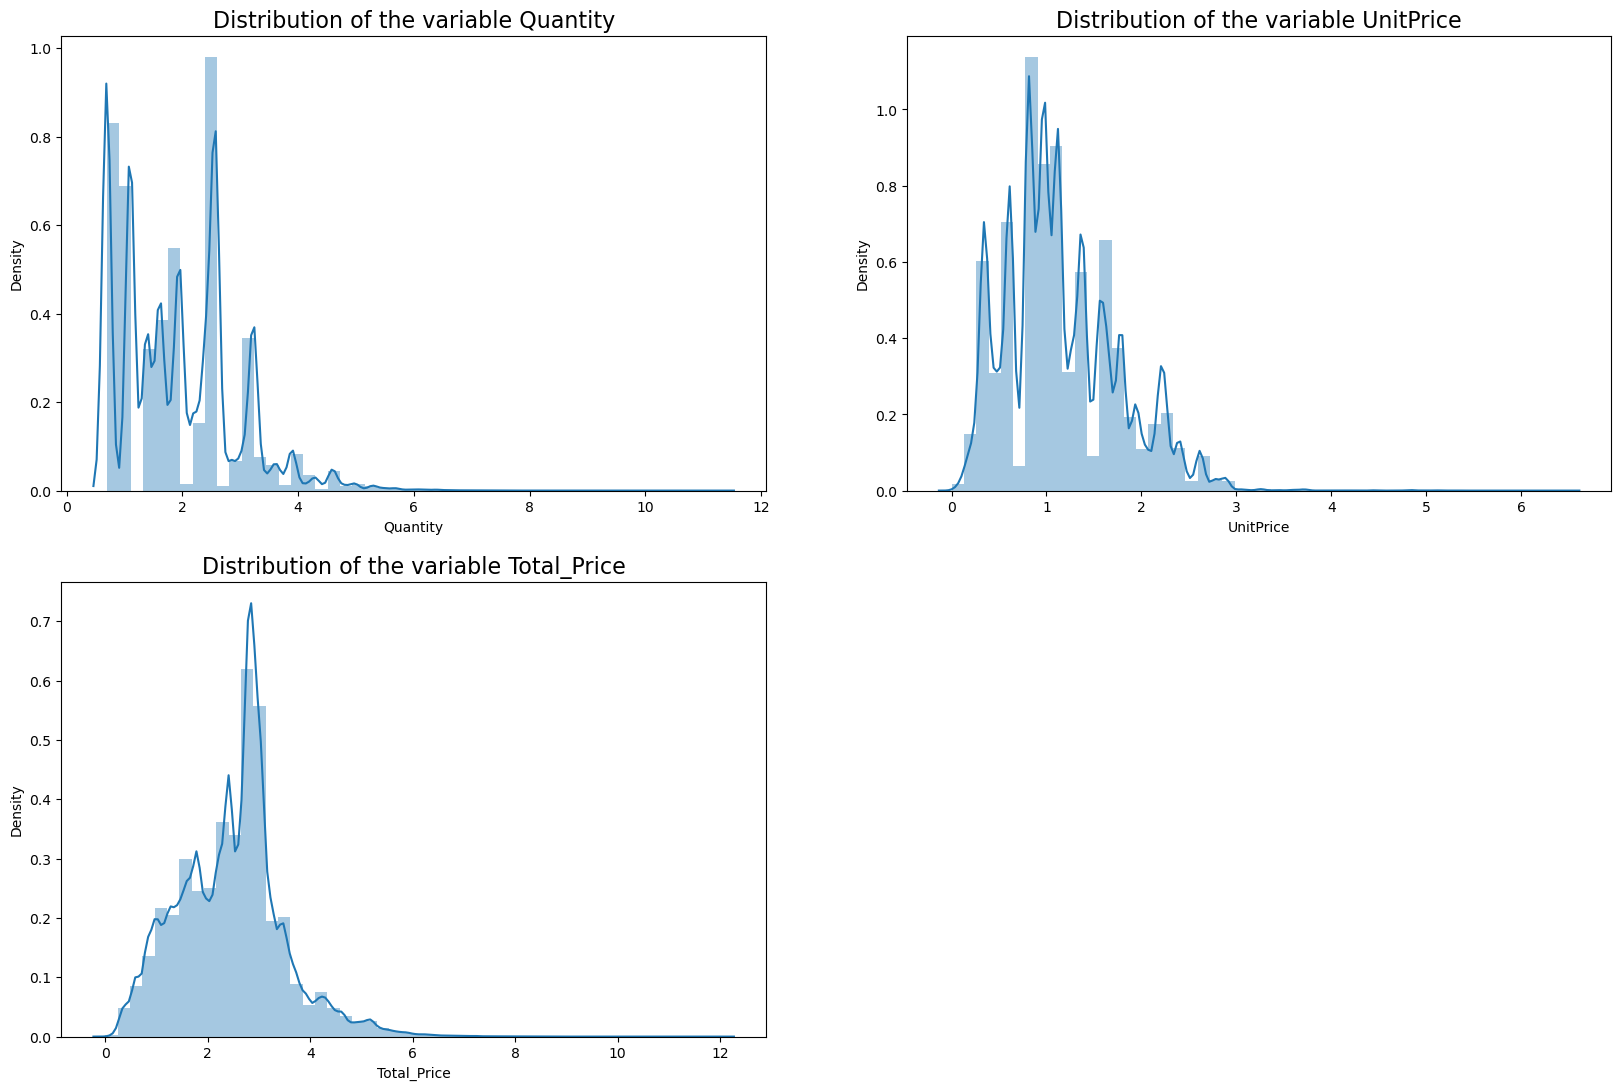

In [197]:
count = 1
plt.subplots(figsize=(20,13))
for feature in num_features:
  plt.subplot(2,2,count)
  sns.distplot(np.log1p(data_cleaned[feature]))
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

**Best Sellers**

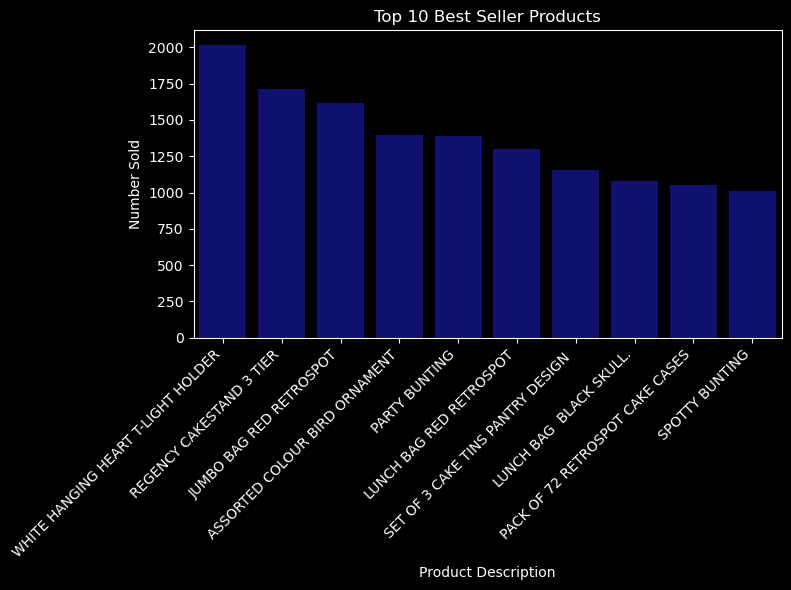

In [275]:
best_seller = data_cleaned['Description'].value_counts().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='index', y='Description', data=best_seller[:10],color='navy')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Best Seller Products')
plt.xlabel('Product Description')
plt.ylabel('Number Sold')
plt.tight_layout()
plt.show()

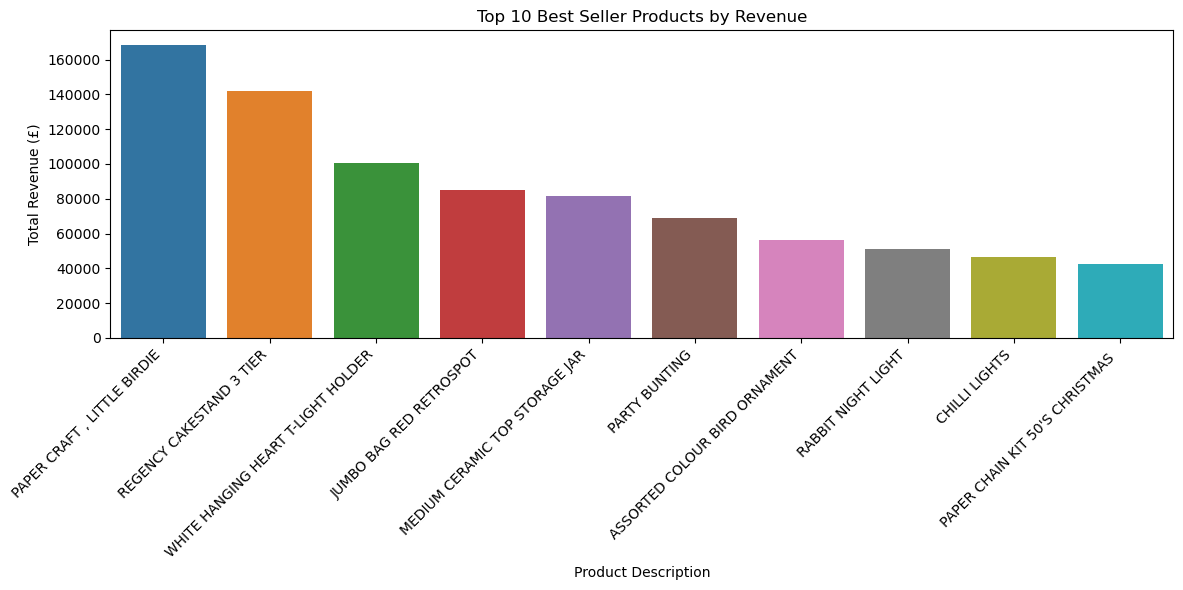

In [199]:
best_seller_revenue = data_cleaned.groupby('Description')['Total_Price'].sum().reset_index()
best_seller_revenue = best_seller_revenue.sort_values(by='Total_Price', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='Description', y='Total_Price', data=best_seller_revenue)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Best Seller Products by Revenue')
plt.xlabel('Product Description')
plt.ylabel('Total Revenue (£)')
plt.tight_layout()
plt.show()

**Least in selling**

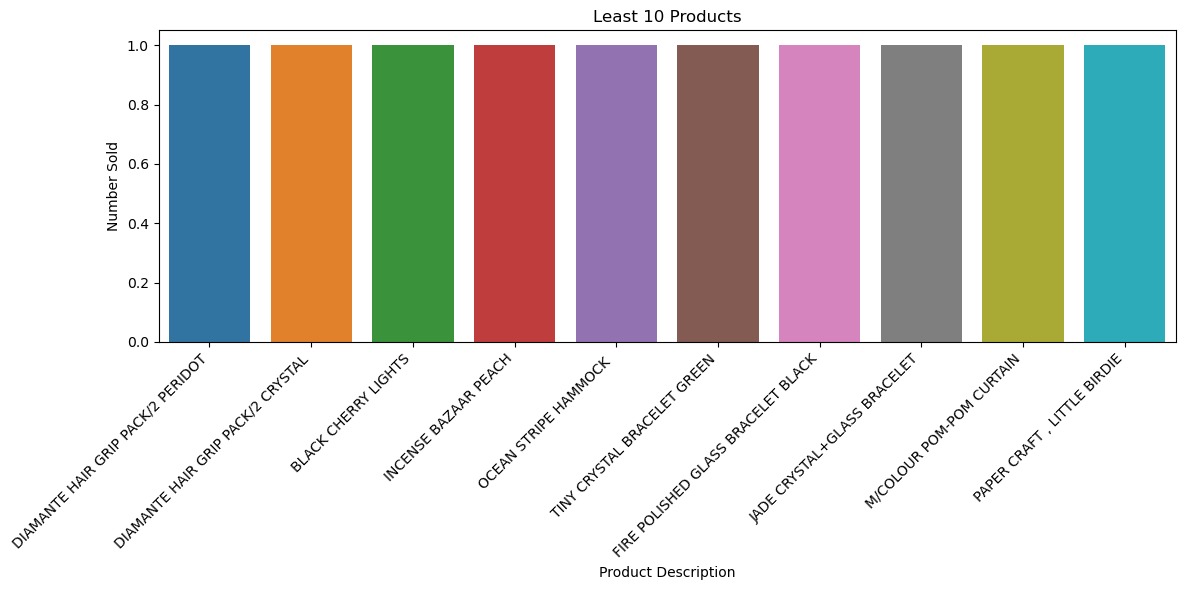

In [250]:
best_seller = data_cleaned['Description'].value_counts().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='index', y='Description', data=best_seller.tail(10))
plt.xticks(rotation=45, ha='right')
plt.title('Least 10 Products')
plt.xlabel('Product Description')
plt.ylabel('Number Sold')
plt.tight_layout()
plt.show()

**Top countries in sales**

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'United Kingdom'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'France'),
  Text(3, 0, 'EIRE'),
  Text(4, 0, 'Spain')])

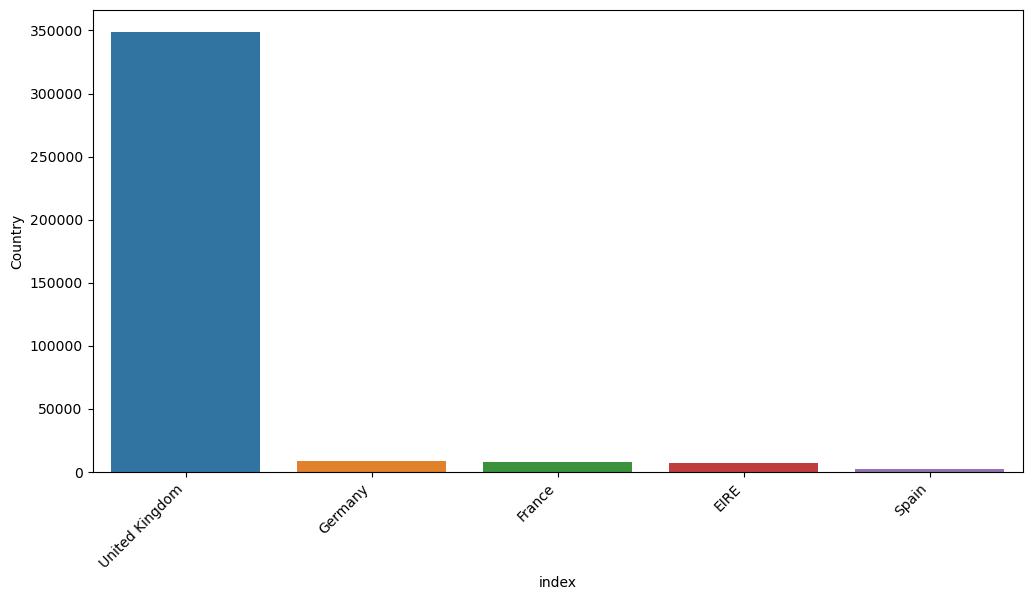

In [201]:
top_countries = data_cleaned['Country'].value_counts().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='index', y='Country', data=top_countries.head(5))
plt.xticks(rotation=45, ha='right')    



**Least countries in sales**

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Lithuania'),
  Text(1, 0, 'Brazil'),
  Text(2, 0, 'Czech Republic'),
  Text(3, 0, 'Bahrain'),
  Text(4, 0, 'Saudi Arabia')])

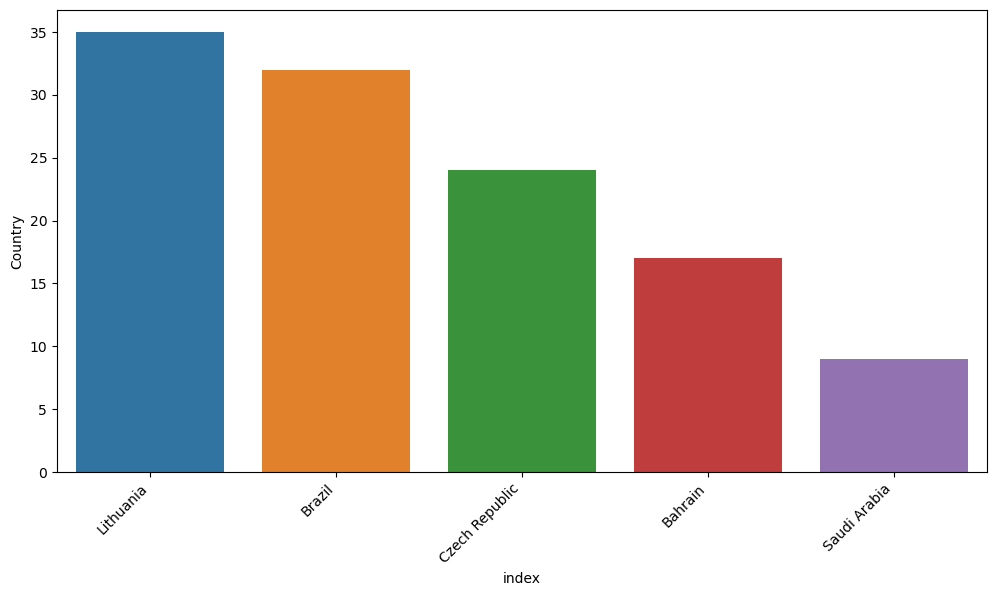

In [202]:
top_countries = data_cleaned['Country'].value_counts().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='index', y='Country', data=top_countries.tail(5))
plt.xticks(rotation=45, ha='right')  

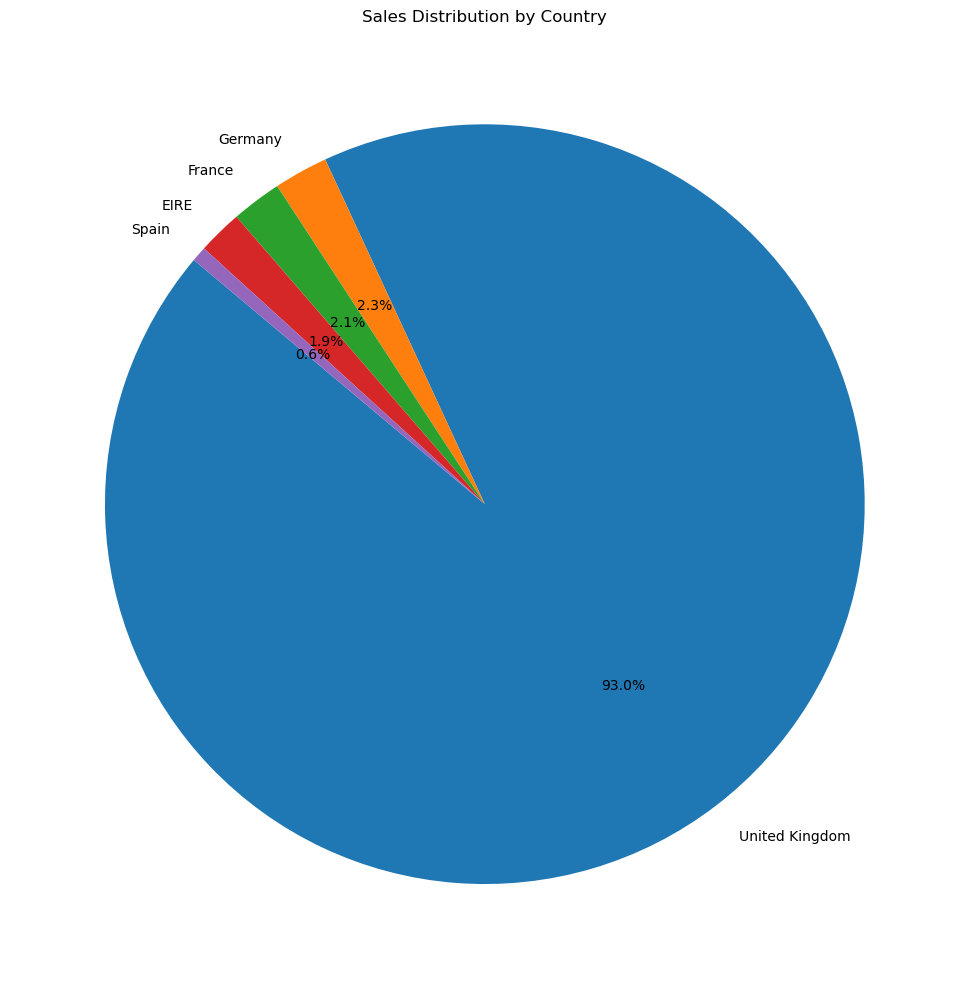

In [203]:
country_sales = data_cleaned['Country'].value_counts().head(5)
plt.figure(figsize=(10, 10))
plt.pie(country_sales, labels=country_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Country')
plt.tight_layout()
plt.show()

**Top customers and Order Share**

In [204]:
c_id_count = data_cleaned['CustomerID'].value_counts()
c_id_total = data_cleaned['CustomerID'].value_counts().sum()

c_order_share = ((c_id_count/c_id_total)*100).reset_index()
c_order_share.columns = ['Customer ID', 'Order Share']
c_order_share

,Customer ID,Order Share
0,17841.0,1.960103
1,14911.0,1.427574
2,14096.0,1.302559
3,12748.0,1.124113
4,14606.0,0.683620
...,...,...
4329,17443.0,0.000256
4330,15070.0,0.000256
4331,17331.0,0.000256
4332,13270.0,0.000256


<Axes: xlabel='Customer ID', ylabel='Order Share'>

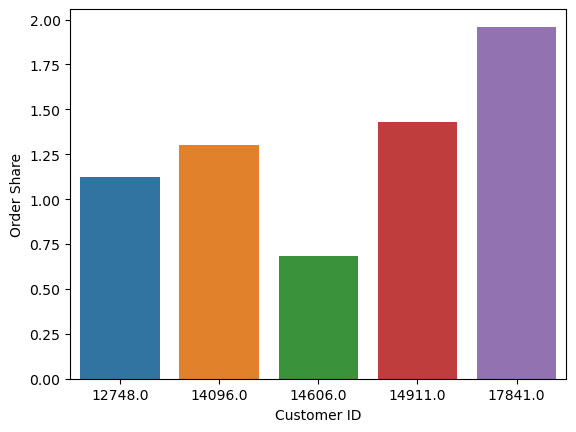

In [205]:
sns.barplot(x= 'Customer ID', y= 'Order Share', data = c_order_share.head(5))

In [206]:
c_order_share['Order Share'] = c_order_share['Order Share'].head().cumsum()
c_order_share.head()


,Customer ID,Order Share
0,17841.0,1.960103
1,14911.0,3.387677
2,14096.0,4.690236
3,12748.0,5.814349
4,14606.0,6.497969


Our top 5 customers account for nearly 6.5% of all orders. This shows that a small group of customers have a disproportionately large impact on sales, indicating an opportunity to identify and target high-value, loyal buyers.

**Top year in sales**

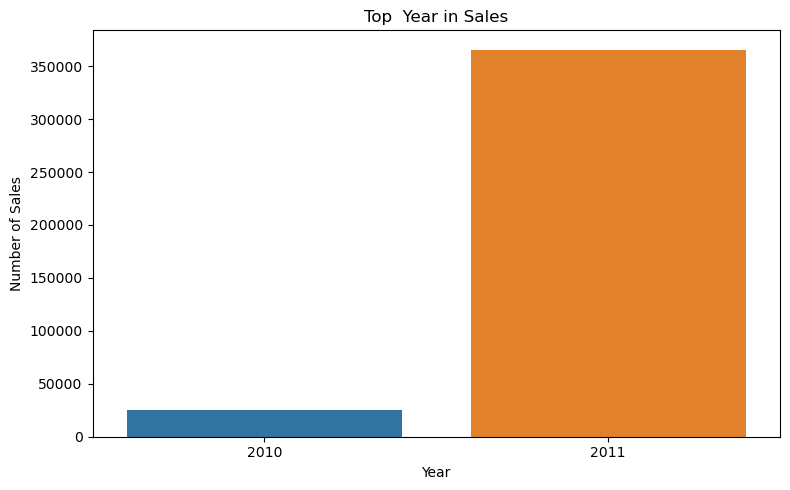

In [207]:
top_years = data_cleaned['year'].value_counts().head(5).reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='index', y='year', data=top_years)
plt.title('Top  Year in Sales')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.tight_layout()
plt.show()

**Most Productive month**

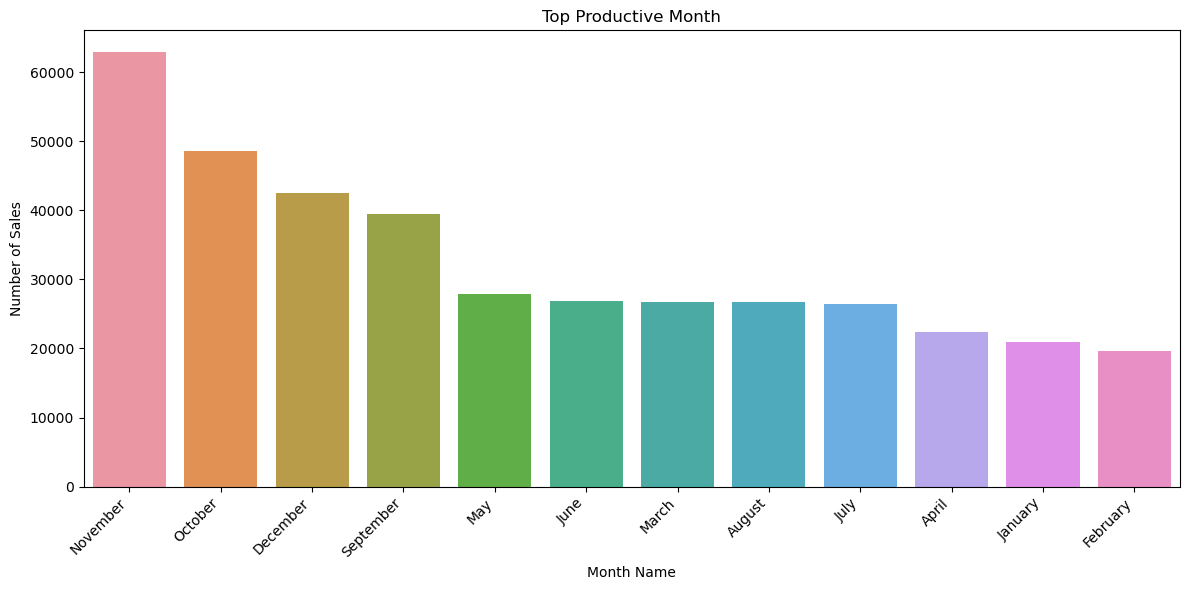

In [208]:
top_month = data_cleaned['month_name'].value_counts().reset_index()
top_month.columns = ['Month Name', 'Count']
top_month = top_month.sort_values(by='Count', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x='Month Name', y='Count', data=top_month)
plt.xticks(rotation=45, ha='right')
plt.title('Top Productive Month')
plt.xlabel('Month Name')
plt.ylabel('Number of Sales')
plt.tight_layout()

**Most productive day**

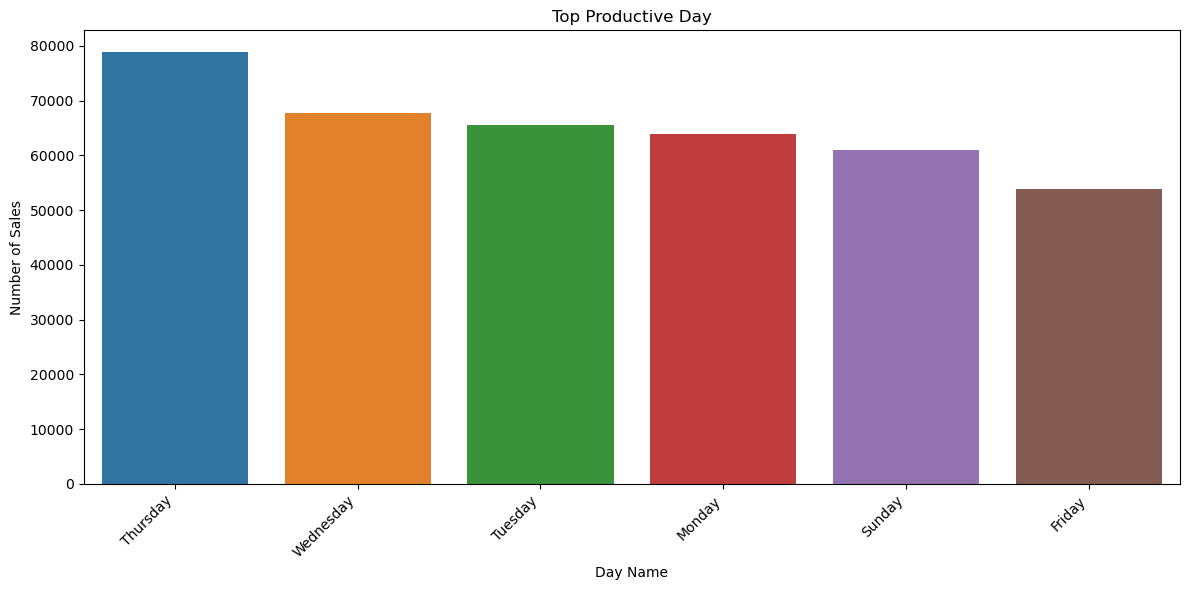

In [209]:
top_day = data_cleaned['day'].value_counts().reset_index()
top_day.columns = ['Day name', 'Count']
plt.figure(figsize=(12,6))
sns.barplot(x='Day name', y='Count', data=top_day)  
plt.xticks(rotation=45, ha='right')
plt.title('Top Productive Day')
plt.xlabel('Day Name')
plt.ylabel('Number of Sales')
plt.tight_layout()


**Outliers**

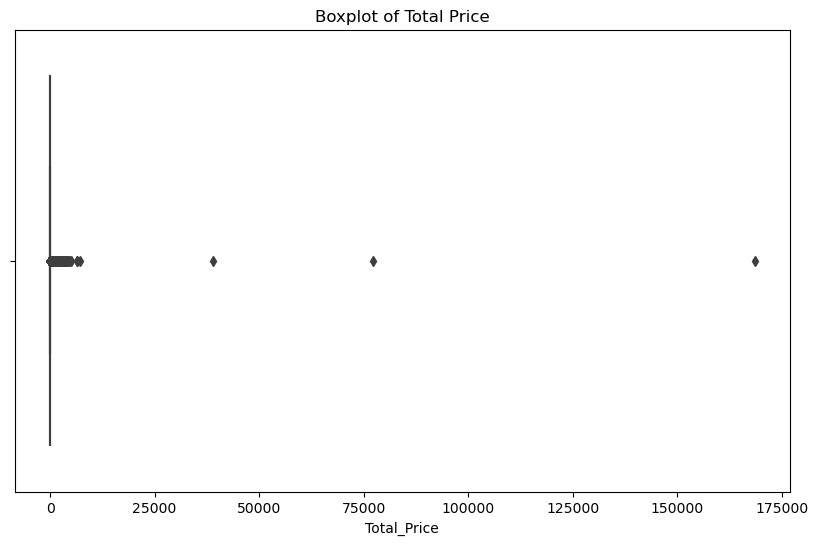

In [210]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data_cleaned['Total_Price'])
plt.title('Boxplot of Total Price')
plt.xlabel('Total_Price')
plt.show()

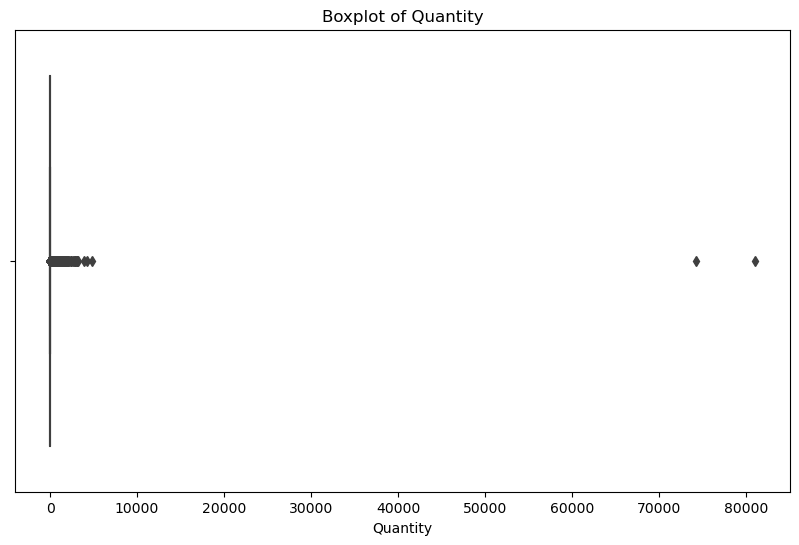

In [211]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data_cleaned['Quantity'])
plt.title('Boxplot of Quantity')
plt.xlabel('Quantity')
plt.show()

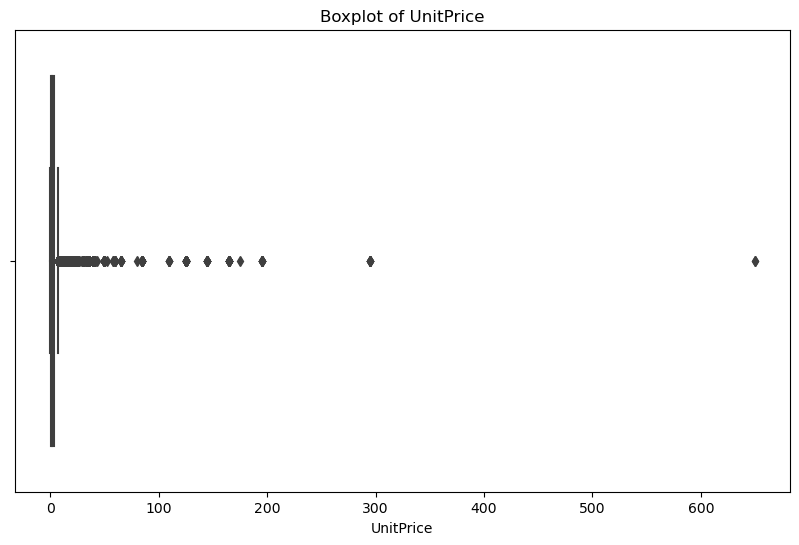

In [212]:

plt.figure(figsize=(10,6))
sns.boxplot(x=data_cleaned['UnitPrice'])
plt.title('Boxplot of UnitPrice')
plt.xlabel('UnitPrice')
plt.show()

In [213]:
import numpy as np
data_cleaned['log_Total_Price'] = np.log1p(data_cleaned['Total_Price'])


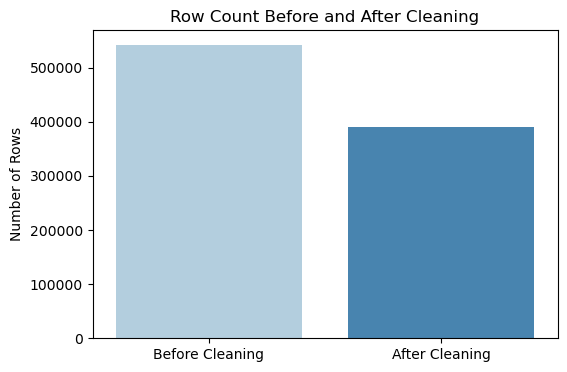

In [249]:
counts = [len(data), len(data_cleaned)]
labels = ['Before Cleaning', 'After Cleaning']

plt.figure(figsize=(6,4))
sns.barplot(x=labels, y=counts, palette='Blues')
plt.title('Row Count Before and After Cleaning')
plt.ylabel('Number of Rows')
plt.show()

**Monthly Sales Trend**

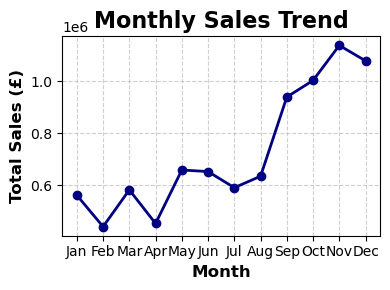

In [ ]:

import matplotlib.pyplot as plt


month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_sales = data_cleaned.groupby('month')['Total_Price'].sum()
monthly_sales.index = month_names[:len(monthly_sales)]  

plt.figure(figsize=(4,3))
plt.plot(monthly_sales.index, monthly_sales.values, 
         color='navy', marker='o', linewidth=2)

plt.title('Monthly Sales Trend', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Total Sales (£)', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**Numeric Insights**

In [215]:
total_revenue = data_cleaned['Total_Price'].sum()
print(f"\nTotal Revenue: {total_revenue:,.2f}")


Total Revenue: 8,737,227.64


In [216]:
invoice_totals = data_cleaned.groupby('InvoiceNo')['Total_Price'].sum()
average_order_value = invoice_totals.mean()
print(f"Average Order Value: £{average_order_value:,.2f}")
display(invoice_totals.head())

Average Order Value: £474.80


InvoiceNo
536365    139.12
536366     22.20
536367    278.73
536368     70.05
536369     17.85
Name: Total_Price, dtype: float64

In [217]:
num_orders = len(invoice_totals)
print(f"Number of Unique Orders: {num_orders}")

Number of Unique Orders: 18402


Total revenue hits 8.7M from 18,400 orders in addition to the 149981.251 from non_product_enteries , with an average order of 474

In [218]:
unique_customers = data_cleaned['CustomerID'].nunique()
print(f"Number of unique customers: {unique_customers}")

Number of unique customers: 4334


In [219]:
data_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,day,month_name,year,month,date,hour,minute,log_Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday,December,2010,12,1,8,26,2.791165
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,2010,12,1,8,26,3.060583
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday,December,2010,12,1,8,26,3.135494
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,2010,12,1,8,26,3.060583
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,2010,12,1,8,26,3.060583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,Friday,December,2011,12,9,12,50,2.415914
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,Friday,December,2011,12,9,12,50,2.610070
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,Friday,December,2011,12,9,12,50,2.867899
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,Friday,December,2011,12,9,12,50,2.867899


# Customer Segmentation

In [220]:
latest_date = data_cleaned['InvoiceDate'].max() + timedelta(days=1)

rfm = data_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,   
    'InvoiceNo': 'nunique',                                  
    'log_Total_Price': 'sum'                                       
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [221]:
print(f"Number of rows after aggregation: {rfm.shape[0]}")

Number of rows after aggregation: 4334


In [222]:
import math
rfm['Recency_log'] = rfm['Recency'].apply(math.log)
rfm['Frequency_log'] = rfm['Frequency'].apply(math.log)
rfm['Monetary_log'] = rfm['Monetary'].apply(math.log)

rfm.head()

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log
0,12346.0,326,1,11.253955,5.786897,0.000000,2.420720
1,12347.0,2,7,549.624425,0.693147,1.945910,6.309235
2,12348.0,75,4,101.734541,4.317488,1.386294,4.622367
3,12349.0,19,1,212.358379,2.944439,0.000000,5.358275
4,12350.0,310,1,46.829722,5.736572,0.000000,3.846518


In [223]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency_log', 'Frequency_log', 'Monetary_log']])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_22476\4169653711.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,count)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_22476\4169653711.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm[feature])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_22476\4169653711.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibilit

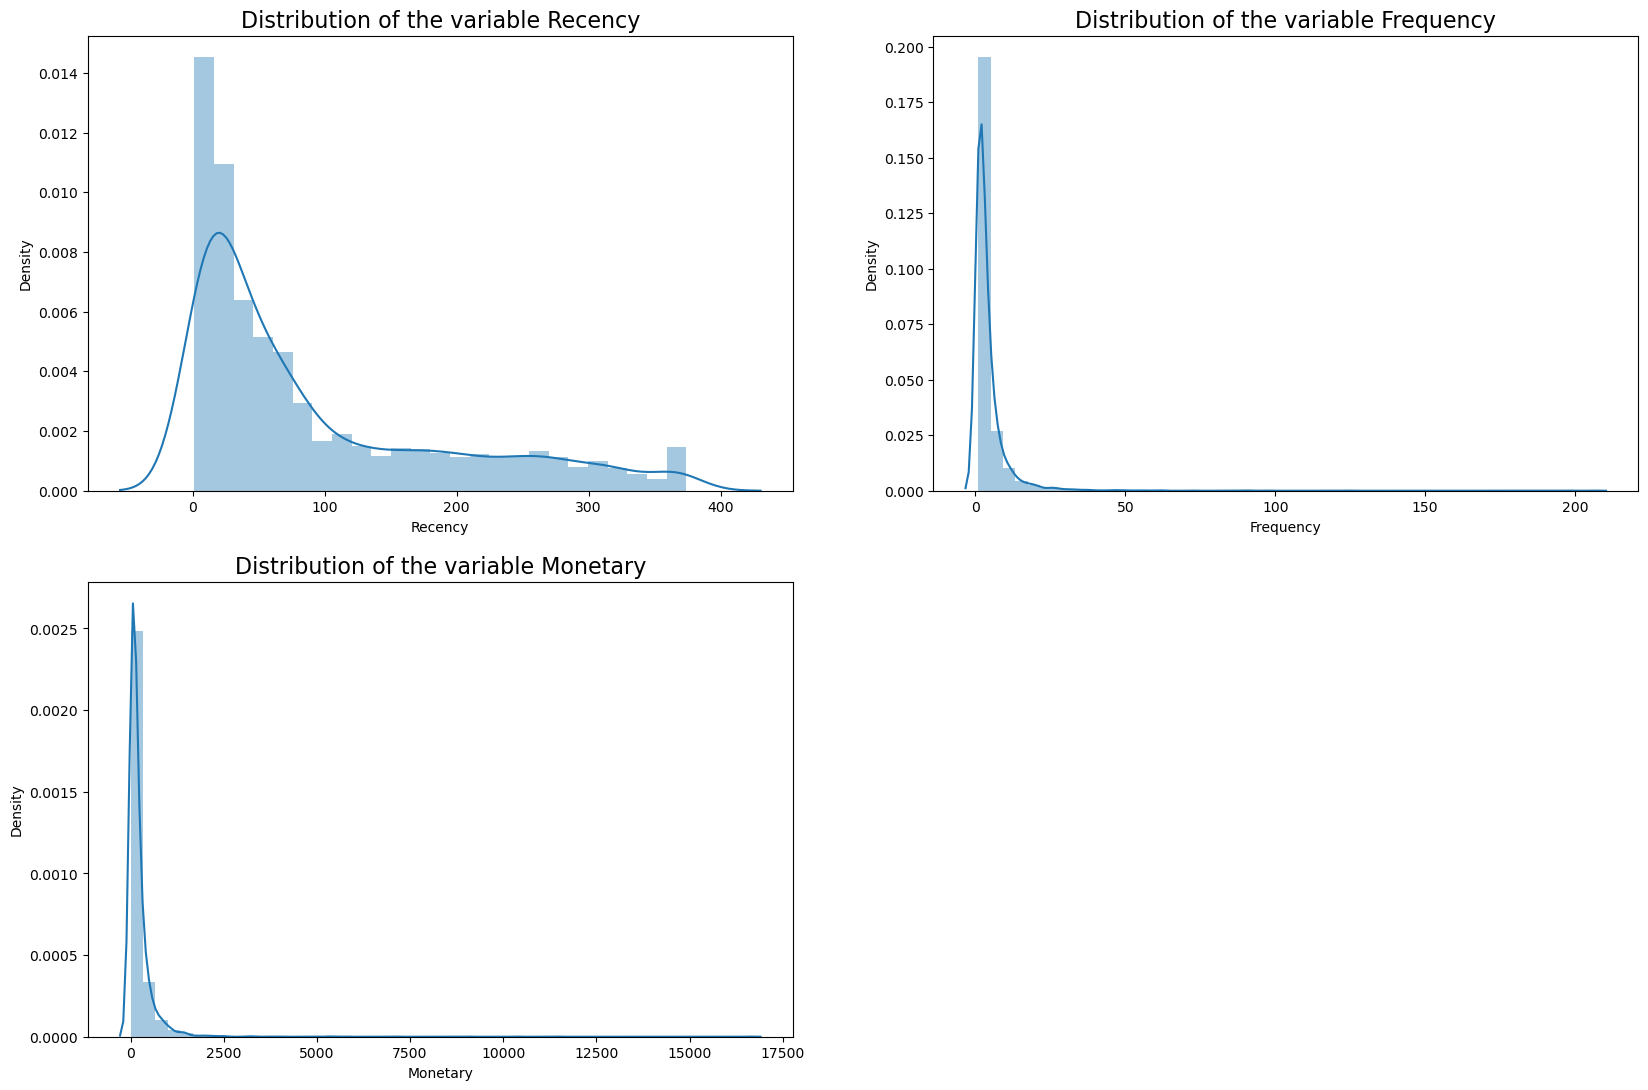

In [224]:
features_to_plot = ['Recency', 'Frequency', 'Monetary']
count = 1
plt.subplots(figsize=(20,13))
for feature in features_to_plot:
    plt.subplot(2,2,count)
    sns.distplot(rfm[feature])
    plt.title(f"Distribution of the variable {feature}", fontsize=16)
    plt.xlabel(f"{feature}")
    plt.ylabel("Density")
    count += 1

In [225]:
def handle_negative(num):
    if num <= 0:
        return 1
    else:
        return num

rfm['Recency'] = [handle_negative(x) for x in rfm['Recency']]
rfm['Monetary'] = [handle_negative(y) for y in rfm['Monetary']]

log_df = rfm[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis=1).round(3)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_22476\1420636162.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,count)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_22476\1420636162.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_df[feature])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_22476\1420636162.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibi

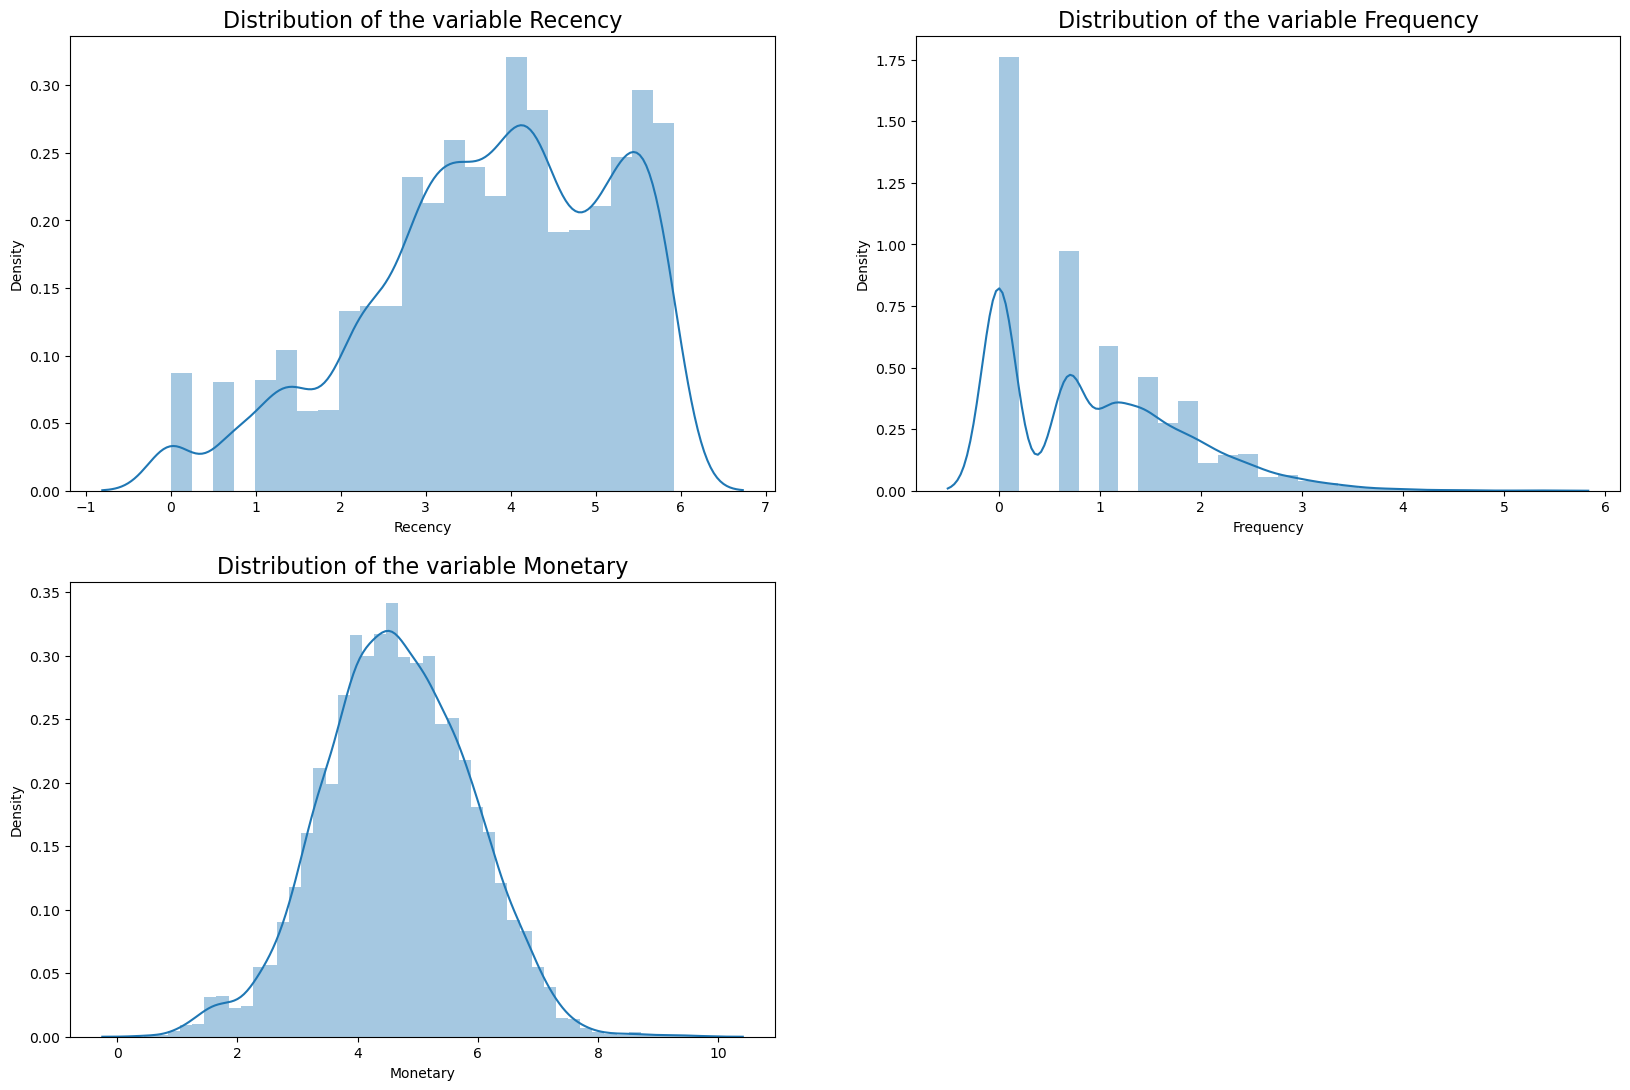

In [226]:
count = 1
plt.subplots(figsize=(20,13))
for feature in log_df:
  plt.subplot(2,2,count)
  sns.distplot(log_df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

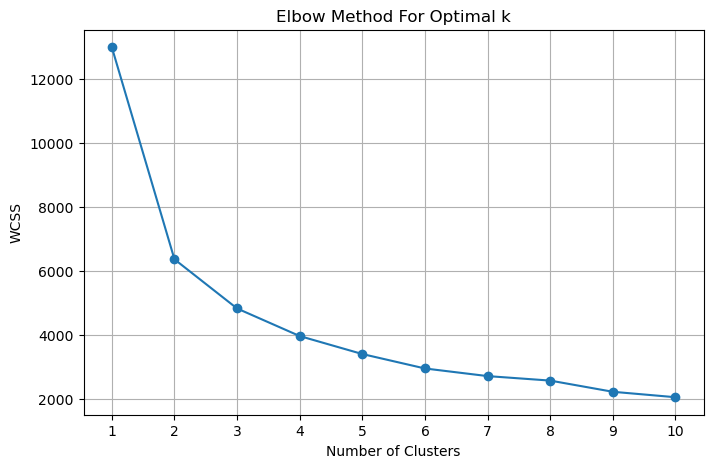

In [227]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


Cluster 3 is the best one based on the elbow method

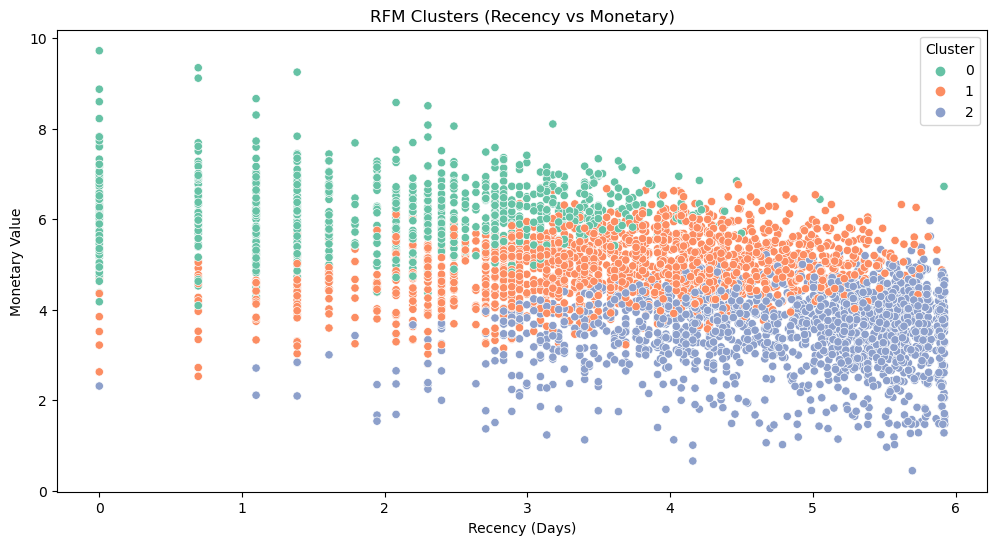

In [228]:
kmeans = KMeans(n_clusters=3, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=rfm, x='Recency_log', y='Monetary_log', hue='Cluster', palette='Set2')
plt.title('RFM Clusters (Recency vs Monetary)')
plt.xlabel('Recency (Days)')
plt.ylabel('Monetary Value')
plt.legend(title='Cluster')
plt.show()

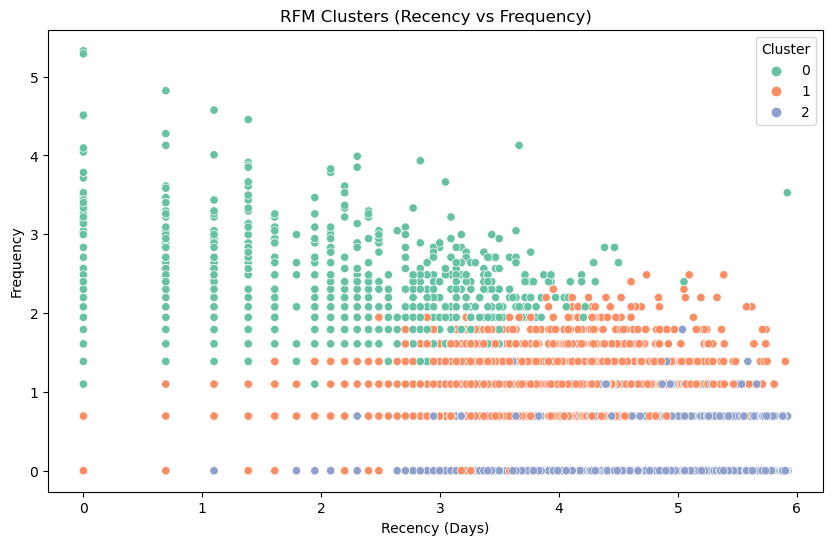

In [229]:
kmeans = KMeans(n_clusters=3, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency_log', y='Frequency_log', hue='Cluster', palette='Set2')
plt.title('RFM Clusters (Recency vs Frequency)')
plt.xlabel('Recency (Days)')
plt.ylabel('Frequency')
plt.legend(title='Cluster')
plt.show()

In [230]:
rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'NumCustomers'})

,Recency,Frequency,Monetary,NumCustomers
Cluster,,,,
0,13.600000,11.974302,661.313532,895
1,59.558495,3.256908,171.161303,1701
2,165.876870,1.234177,46.512546,1738


In [231]:
import numpy as np
import pandas as pd

rfm['Cluster'] = kmeans.labels_  


rfm['Recency'] = np.exp(rfm['Recency_log'])
rfm['Frequency'] = np.exp(rfm['Frequency_log'])
rfm['Monetary'] = np.exp(rfm['Monetary_log'])

cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': ['mean', 'median'],
    'Frequency': ['mean', 'median'],
    'Monetary': ['mean', 'median', 'count']
}).round(2)


cluster_summary.columns = ['_'.join(col) for col in cluster_summary.columns]
cluster_summary = cluster_summary.reset_index()

from IPython.display import display
display(cluster_summary)


,Cluster,Recency_mean,Recency_median,Frequency_mean,Frequency_median,Monetary_mean,Monetary_median,Monetary_count
0,0,13.60,9.0,11.97,8.0,661.31,461.17,895
1,1,59.56,40.0,3.26,3.0,171.16,142.02,1701
2,2,165.88,157.0,1.23,1.0,46.51,40.04,1738


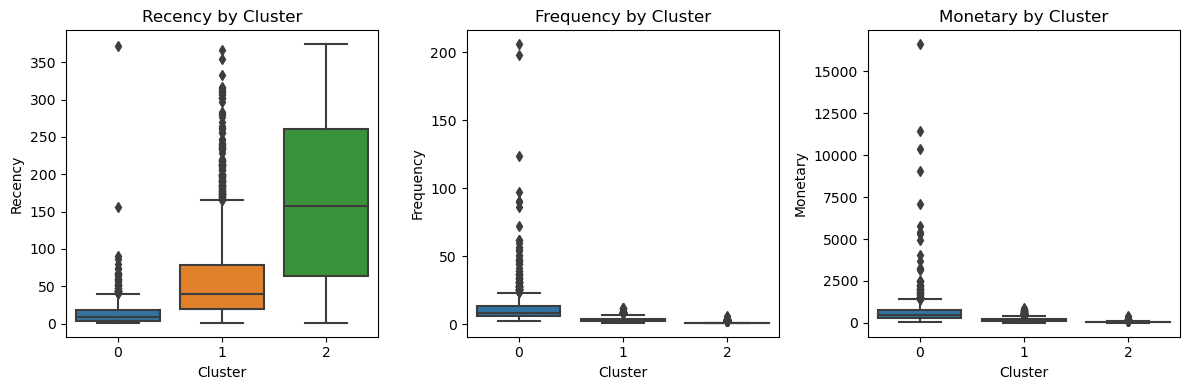

In [232]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

for i, col in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Cluster', y=col, data=rfm)
    plt.title(f'{col} by Cluster')

plt.tight_layout()
plt.show()


In [233]:

rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M_score'] = pd.qcut(rfm['Monetary'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])


rfm['RFM_Score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)


In [234]:
rfm

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,Cluster,R_score,F_score,M_score,RFM_Score
0,12346.0,326.0,1.0,11.253955,5.786897,0.000000,2.420720,2,1,1,1,111
1,12347.0,2.0,7.0,549.624425,0.693147,1.945910,6.309235,0,5,5,5,555
2,12348.0,75.0,4.0,101.734541,4.317488,1.386294,4.622367,1,2,4,3,243
3,12349.0,19.0,1.0,212.358379,2.944439,0.000000,5.358275,1,4,1,4,414
4,12350.0,310.0,1.0,46.829722,5.736572,0.000000,3.846518,2,1,1,2,112
...,...,...,...,...,...,...,...,...,...,...,...,...
4329,18280.0,278.0,1.0,29.342371,5.627621,0.000000,3.379033,2,1,2,1,121
4330,18281.0,181.0,1.0,16.823758,5.198497,0.000000,2.822792,2,1,2,1,121
4331,18282.0,8.0,2.0,32.267847,2.079442,0.693147,3.474071,1,5,3,1,531
4332,18283.0,4.0,16.0,863.829927,1.386294,2.772589,6.761376,0,5,5,5,555


In [235]:
rfm['Cluster'] = kmeans.labels_
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,Cluster,R_score,F_score,M_score,RFM_Score
0,12346.0,326.0,1.0,11.253955,5.786897,0.000000,2.420720,2,1,1,1,111
1,12347.0,2.0,7.0,549.624425,0.693147,1.945910,6.309235,0,5,5,5,555
2,12348.0,75.0,4.0,101.734541,4.317488,1.386294,4.622367,1,2,4,3,243
3,12349.0,19.0,1.0,212.358379,2.944439,0.000000,5.358275,1,4,1,4,414
4,12350.0,310.0,1.0,46.829722,5.736572,0.000000,3.846518,2,1,1,2,112


In [240]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(rfm_scaled)


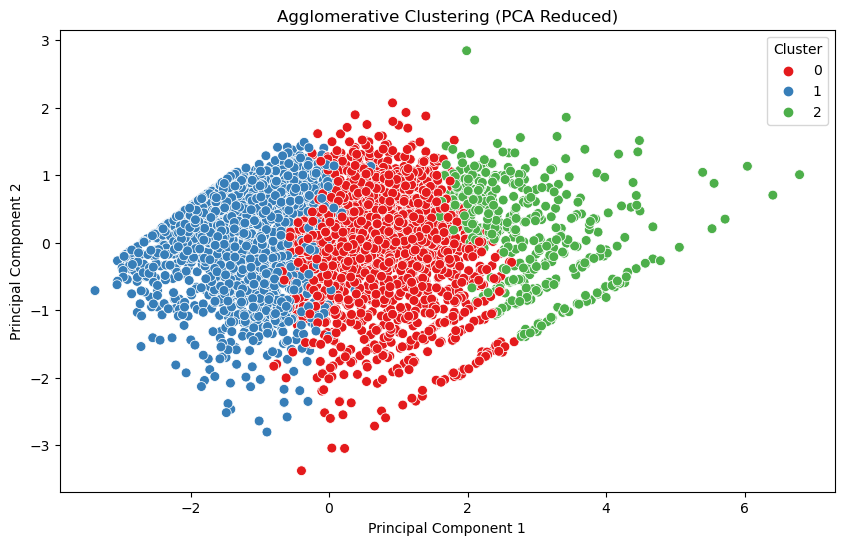

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)

rfm_plot = pd.DataFrame()
rfm_plot['PCA1'] = rfm_pca[:, 0]
rfm_plot['PCA2'] = rfm_pca[:, 1]
rfm_plot['Cluster'] = agglo_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_plot, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=50)
plt.title('Agglomerative Clustering (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


In [243]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=5)
db_labels = db.fit_predict(rfm_scaled)


mask = db_labels != -1



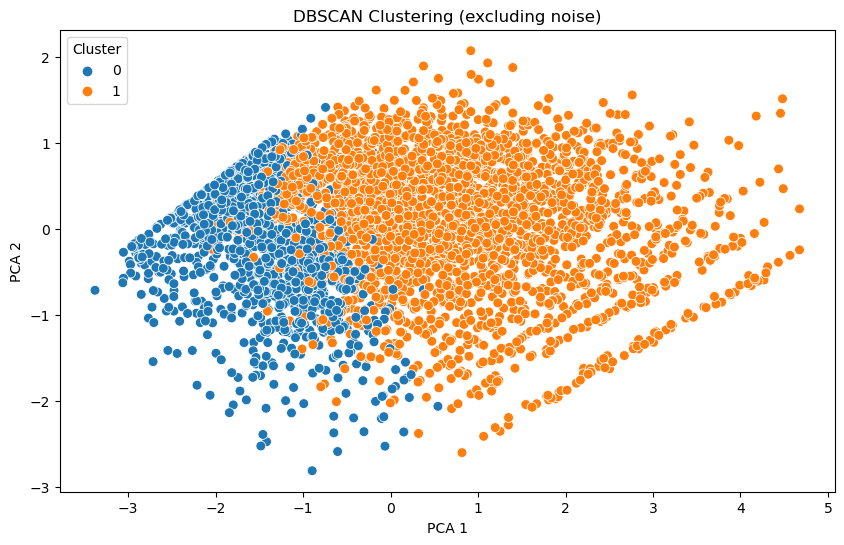

In [244]:

pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)

rfm_plot = pd.DataFrame()
rfm_plot['PCA1'] = rfm_pca[:, 0]
rfm_plot['PCA2'] = rfm_pca[:, 1]
rfm_plot['Cluster'] = db_labels

rfm_plot_filtered = rfm_plot[rfm_plot['Cluster'] != -1]


plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_plot_filtered, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=50)
plt.title('DBSCAN Clustering (excluding noise)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()


# Evaluation

In [237]:
score = silhouette_score(rfm_scaled, kmeans.labels_)
print(f"Silhouette Score: {score:.4f}")


Silhouette Score: 0.3296


In [238]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(rfm_scaled, kmeans.labels_)
print(f"Davies–Bouldin Score: {db_score:.4f}")


Davies–Bouldin Score: 1.0597


In [241]:
print("Silhouette:", silhouette_score(rfm_scaled, agglo_labels))
print("Davies-Bouldin:", davies_bouldin_score(rfm_scaled, agglo_labels))

Silhouette: 0.33191087159735744
Davies-Bouldin: 0.9910548209750277


In [246]:
print("Silhouette (DBSCAN):", silhouette_score(rfm_scaled[mask], db_labels[mask]))
print("Davies-Bouldin:", davies_bouldin_score(rfm_scaled[mask], db_labels[mask]))

Silhouette (DBSCAN): 0.3264090637451281
Davies-Bouldin: 1.003659479037884
